# Physique :  TraitementSignal : Filtre de butterworh

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : September 6th 2020
- update : 
 

In [2]:
import os
import re
import numpy as np

In [3]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [5]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser

In [6]:
from scipy import signal

In [12]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(8,4)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [8]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [15]:
signal.butter?

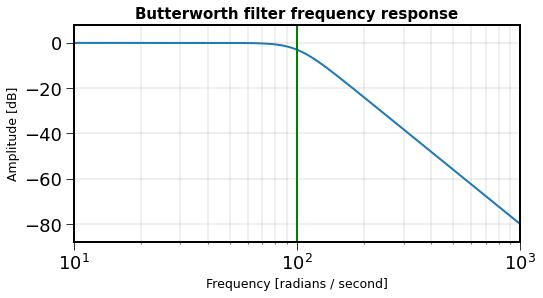

In [14]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

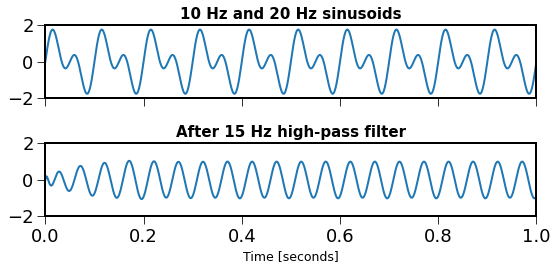

In [18]:
t = np.linspace(0, 1, 1000, False)  # 1 second

sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(t, sig)

ax1.set_title('10 Hz and 20 Hz sinusoids')

ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')

filtered = signal.sosfilt(sos, sig)

ax2.plot(t, filtered)

ax2.set_title('After 15 Hz high-pass filter')

ax2.axis([0, 1, -2, 2])

ax2.set_xlabel('Time [seconds]')

plt.tight_layout()

plt.show()
